# Single Neuro Logistic Regression

We will implement and train this model on the palmerpenguins dataset, and get started by running the following code in the cell below.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("palmer_penguins.csv")

The single neuro logistic regression still is used to address the binary classification problem. So, in this case, we pick two species from penguin datasets which are 'Adelie' penguin and 'Gentoo' penguin respectively. Using the bill_depth and flipper_length as features.

## Data preprocessing

In [3]:
df.dropna(inplace = True)

In [4]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [5]:
df.tail(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [6]:
ad = df[df["species"]=="Adelie"]
gen = df[df["species"]=="Gentoo"]

Next, we first visualize the "Adelie" and "Gentoo" penguin species based on bill_depth and flipper_length

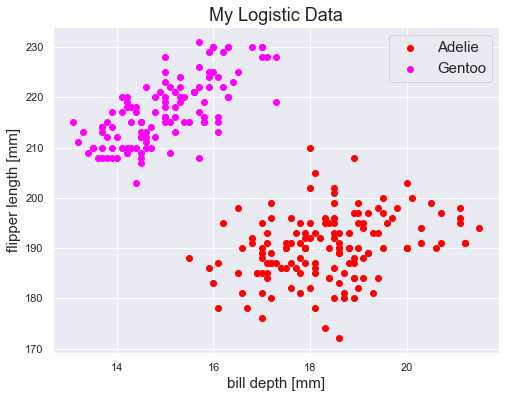

In [7]:
plt.figure( figsize = (8,6))
plt.scatter(ad.bill_depth_mm,
           ad.flipper_length_mm,
           color = "red", 
        label = "Adelie")
plt.scatter(gen.bill_depth_mm,
           gen.flipper_length_mm,
           color = "magenta", 
        label = "Gentoo")
plt.xlabel("bill depth [mm]", fontsize = 15)
plt.ylabel("flipper length [mm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Logistic Data", fontsize = 18)
plt.show()

From the plot above, we can see that when bill depth[mm] is lower than 16.5, the probability of selecting Gentoo species is higher than that of Adelie species. And when flipper depth is higher than 205mm, the probability of selecting Gentoo species is higher than that of Adelie species too.

Next, we define the bill_depth and flipper_length as features X, 'Adelie' and 'Gentoo' species labeled as 1 and 0 repectively. 

In [8]:
X = pd.concat([ad[['species','bill_depth_mm','flipper_length_mm']],
                   gen[['species','bill_depth_mm','flipper_length_mm']]])
y = np.where(X.species == "Adelie", 0, 1)
X_two = X[['bill_depth_mm','flipper_length_mm']].values

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_two, 
                                                   y,
                                                   test_size = 0.4,
                                                   random_state = 3)

## Single Neuro Logistic Regression Model Applied

Let us next instantiate a SingleNeuron model with bill depth and flipper length measurements as input, train this model with the same learning rate and number of epochs as the variable node, and then plot the cost function over epochs.This can be done by running the following code in the cell below.



In [10]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

 - ### Define Sigmold Activation Function

In [11]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))


- ### Define Cost Function

In [12]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

- ###  Train the model

In [21]:
node_two = SingleNeuron(sigmoid, cross_entropy_loss)
node_two.train(X_train, y_train, alpha = 0.01, epochs = 5000)


<ipython-input-12-7613a36779a2>:2: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
<ipython-input-12-7613a36779a2>:2: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


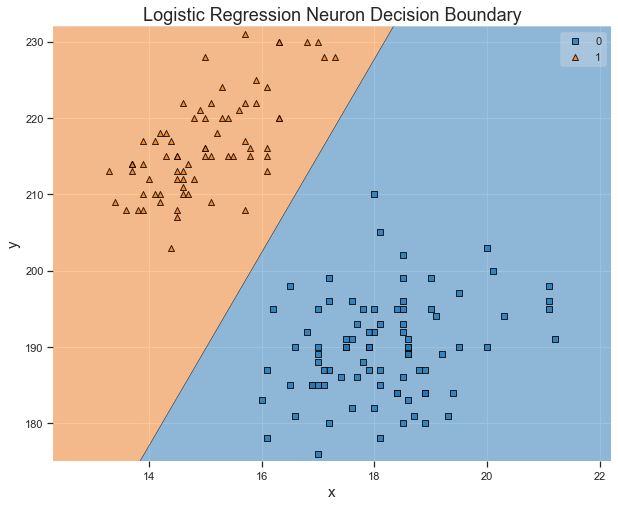

In [22]:
node_two.plot_decision_boundary(X_train, y_train)

After running notice that even with the logistic regression single neuron, we are still learning a linearly seperating hyperplane.

From the decison boundary above, we can see that the model works very well. Next, we can perform the error analysis.

## Error Analysis

We can perform the error analysis through the cost function plot set in the alogrithm and classification error calculated

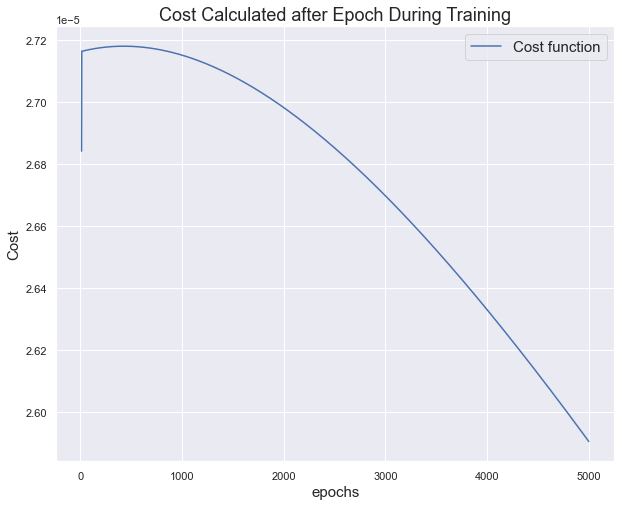

In [23]:
node_two.plot_cost_function()

In [24]:
np.rint(node_two.predict(X_test)) != y_test

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [25]:
classification_error = (np.rint(node_two.predict(X_test)) != y_test).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y_test)}")

Classification Error = 0.0


Through the cost_function plot and classification error which is equal to 0, we can see that the single neuro logistic regression model trained performs very well.

we also can check the performance of algorithm through confusion matrix and classfication report.

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        46

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106
 



<AxesSubplot:>

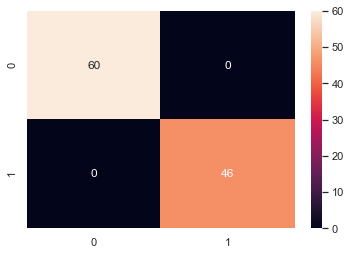

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(f"Logistic Regression Classification Report")
print(classification_report(y_test, np.rint(node_two.predict(X_test))), "\n")

confusion_m = confusion_matrix(y_test, np.rint(node_two.predict(X_test)))
# convert the confusion matrix into dataframe

matrix_df = pd.DataFrame(confusion_m)
sns.heatmap(matrix_df,annot=True)



From the confusion matric and classfication report, the logistic regression which trained based on training data can fit the 
test data very well. We can reach the conclusion that the logistic regression model makes this classfication very well.